In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from ast import literal_eval
%matplotlib inline
pd.set_option('display.max_colwidth', -1)


In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [34]:
# load the pre-calculated cluster/super cluster assignments for all Kadist tagged works
df = pd.read_csv('results/mca_assignments.csv')

df = df.drop(columns=['description', 'machine_tags'])

df = df[df.Ivan.notnull()]

df[['clusters_fmeasure']] = df[['clusters_fmeasure']].fillna(0)
df=df.replace(np.nan, '[]', regex=True)

for col in [
        'user_tags',
        'Ivan','Vincent','Marie', 'Kathleen',
        'user_aggrement', 'user_clusters_formatted',
        'user_clusters_no_scores', 'machine_clusters_formatted'
    ]:
    df[col] = df[col].apply(lambda x: literal_eval(x))
df['clusters_fmeasure'] = df.clusters_fmeasure.astype(float)


  - `user_tags` were created by Ivan
  - Ivan/Vincent/Marie/Kathleen are the cluster assignments made for the work from the tags
  - `user_aggrement` is clusters where more than one person agreed with someone else
  - `user_clusters_no_scores` are the AI generated clusters from Ivan's tags
  - `machine_clusters_no_scores` are the AI generated clusters from the text description
  - `clusters_fmeasure` is a metric of agreement between the AI generated clusters from the text description and `user_aggrement`

In [35]:
df.sort_values(by=['clusters_fmeasure'], ascending=False).head(33)


,artist_name,title,user_tags,Ivan,Vincent,Marie,Kathleen,user_aggrement,user_clusters_formatted,user_clusters_no_scores,user_clusters_sum_of_scores,machine_clusters_formatted,machine_clusters_no_scores,machine_clusters_sum_of_scores,clusters_fmeasure
6,Brook Andrew,Loop. A Model of how the World Operates,"[tension, tradition, modernity, heritage, culture, resilience]","[Culture, Familial, History]","[Culture, Technology, History]","[Culture, Arts, History]","[Mass media, History, Culture]","[Culture, History]","[Mind/5.574358974358974, Culture/3.269230769230769, Values/2.307692307692308]","[Mind, Culture, Values]",11.151282,"[Mind/5.671794871794871, Culture/3.3076923076923075, History/2.6333333333333333]","['Mind', 'Culture', 'History']",11.612821,0.800000
26,Gulumbu Yunupingu,Gan'yu - stars,"[stars, cosmology, family, spirit, tradition, ceremony]","[Spirituality, Familial, Culture]","[Familial, Spirituality, Space]","[Community, History, Mind]","[Familial, Space, Spirituality]","[Spirituality, Space, Familial]","[Space/7.823443223443223, Mind/5.6743589743589755, Arts/4.689724310776942]","[Space, Mind, Arts]",18.187527,"[Space/7.823443223443223, Familial/7.78021978021978, Arts/5.719413919413919]","['Space', 'Familial', 'Arts']",21.323077,0.666667
20,Christian Capurro,Another MIsspent Portrait,"[labour, history, time, erasure, economy, portraiture]","[Immaterial, Time, Economy]","[Body, Economy, History]","[Economy, Mass media, Power]","[History, Politics, Time]","[History, Time, Economy]","[Economy/3.6025641025641026, Time/2.478321678321678, History/1.0]","[Economy, Time, History]",7.080886,"[History/3.2475524475524473, War/2.75, Time/2.5874125874125875]","['History', 'War', 'Time']",8.584965,0.666667
19,Jon Campbell,Stacks on,"[colloquialism, slang, vernacular, australia, text, advertising]","[Language, Identity, Culture]","[Identity, Community, Culture]","[Mass media, Culture, Urbanization]","[Language, Culture, Materiality]","[Language, Culture, Identity]","[Language/10.833333333333334, Land/3.5712418300653597, Urbanization/3.1790849673202617]","[Language, Land, Urbanization]",17.583660,"[Language/7.417582417582417, Media/3.646606334841629, Culture/3.3076923076923075]","['Language', 'Media', 'Culture']",14.371881,0.666667
17,Ian Burns,Showtime,"[stage, fiction, mass media, illusion, spectacle, misinformation]","[Mass media, Technology, Fantasy]","[Power, Fantasy, Mass media]","[Power, Technology, Mass media]","[Technology, Mass media, Materiality]","[Power, Fantasy, Mass media, Technology]","[Fantasy/6.491666666666667, Spirituality/2.533119658119658, Time/2.466666666666667]","[Fantasy, Spirituality, Time]",11.491453,"[Technology/4.220588235294117, Arts/3.1076923076923078, Power/2.511655011655012]","['Technology', 'Arts', 'Power']",9.839936,0.571429
21,Daniel Crooks,Static No. 12,"[time, movement, distortion, elasticity, fluidity, continuum]","[Time, Physics, Culture]","[Body, Time, Identity]","[Community, Physics, Time]","[Time, Space, Technology]","[Physics, Time]","[Time/5.848595848595849, Geopolitics/3.2026143790849675, Physics/2.435897435897436]","[Time, Geopolitics, Physics]",11.487108,"[Geopolitics/4.758169934640523, Politics/4.023529411764706, Time/3.4347069597069595]","['Geopolitics', 'Politics', 'Time']",12.216406,0.400000
29,Justene Williams,Crutch Dance,"[saturated, environment, movement, frenetic, art history, detritus]","[Fantasy, Materiality, Arts]","[Fantasy, Culture, Materiality]","[Culture, Mass media, Fantasy]","[Environmental, Technology, Physics]","[Materiality, Culture, Fantasy]","[Geopolitics/3.2026143790849675, Environmental/2.575854700854701, Body/1.0]","[Geopolitics, Environmental, Body]",6.778469,"[Time/5.317748917748918, Arts/5.20392156862745, Materiality/5.037484737484737]","['Time', 'Arts', 'Materiality']",15.559155,0.333333
25,Christian Thomson,Gamu Mambu (Blood Song),"[cultural identity, indigenous, incongruity, interpretation, language, communication, song]","[Language, Identity, Culture]","[

In [36]:
100*((df.clusters_fmeasure > 0.32).sum()/df.shape[0])

33.33333333333333

## Analysis of how much agreement between people

In the below we see

  - no agreement on the cluster between people, most of the time (17 of 35)
  - limited agreement where people agreed on only one cluster (15 of 35)
  - occasionally people agreed on two clusters (3 of 35)

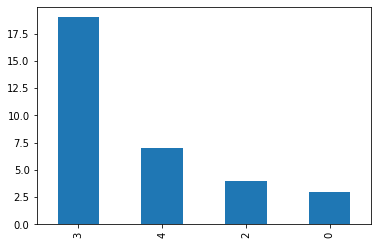

In [6]:
df.user_aggrement.str.len().value_counts().plot.bar();